In [1]:
# compare allbasin results with one basin results

In [1]:
import sys, os, glob, pickle, toml, json
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Compare with two error metric model (mo-asmo)

In [3]:

# for tarbasin in range(1, 627, 10):
    
#     inpath_moasmo = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/'
#     infile1 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs/iter0_many_metric.csv'
#     infile2 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs/iter1_many_metric.csv'
#     infile3 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs_emutest/iter1_many_metric.csv'
    
#     df_iter0 = pd.read_csv(infile1)
#     df_iter1_ob = pd.read_csv(infile2)
#     df_iter1_ab = pd.read_csv(infile3)
    
#     # compare two error metrics
#     labels = ['iter0', 'iter1_onebasin', 'iter1_allbasin']
#     data = [df_iter0, df_iter1_ob, df_iter1_ab]
    
#     fig = plt.figure(figsize=[8, 8])
#     for i in range(3):
#         plt.scatter(data[i]['mae'], data[i]['max_mon_abs_err'], alpha=0.5, label=labels[i])
#     plt.title(f'basin {tarbasin}')
#     plt.legend()
#     plt.show()

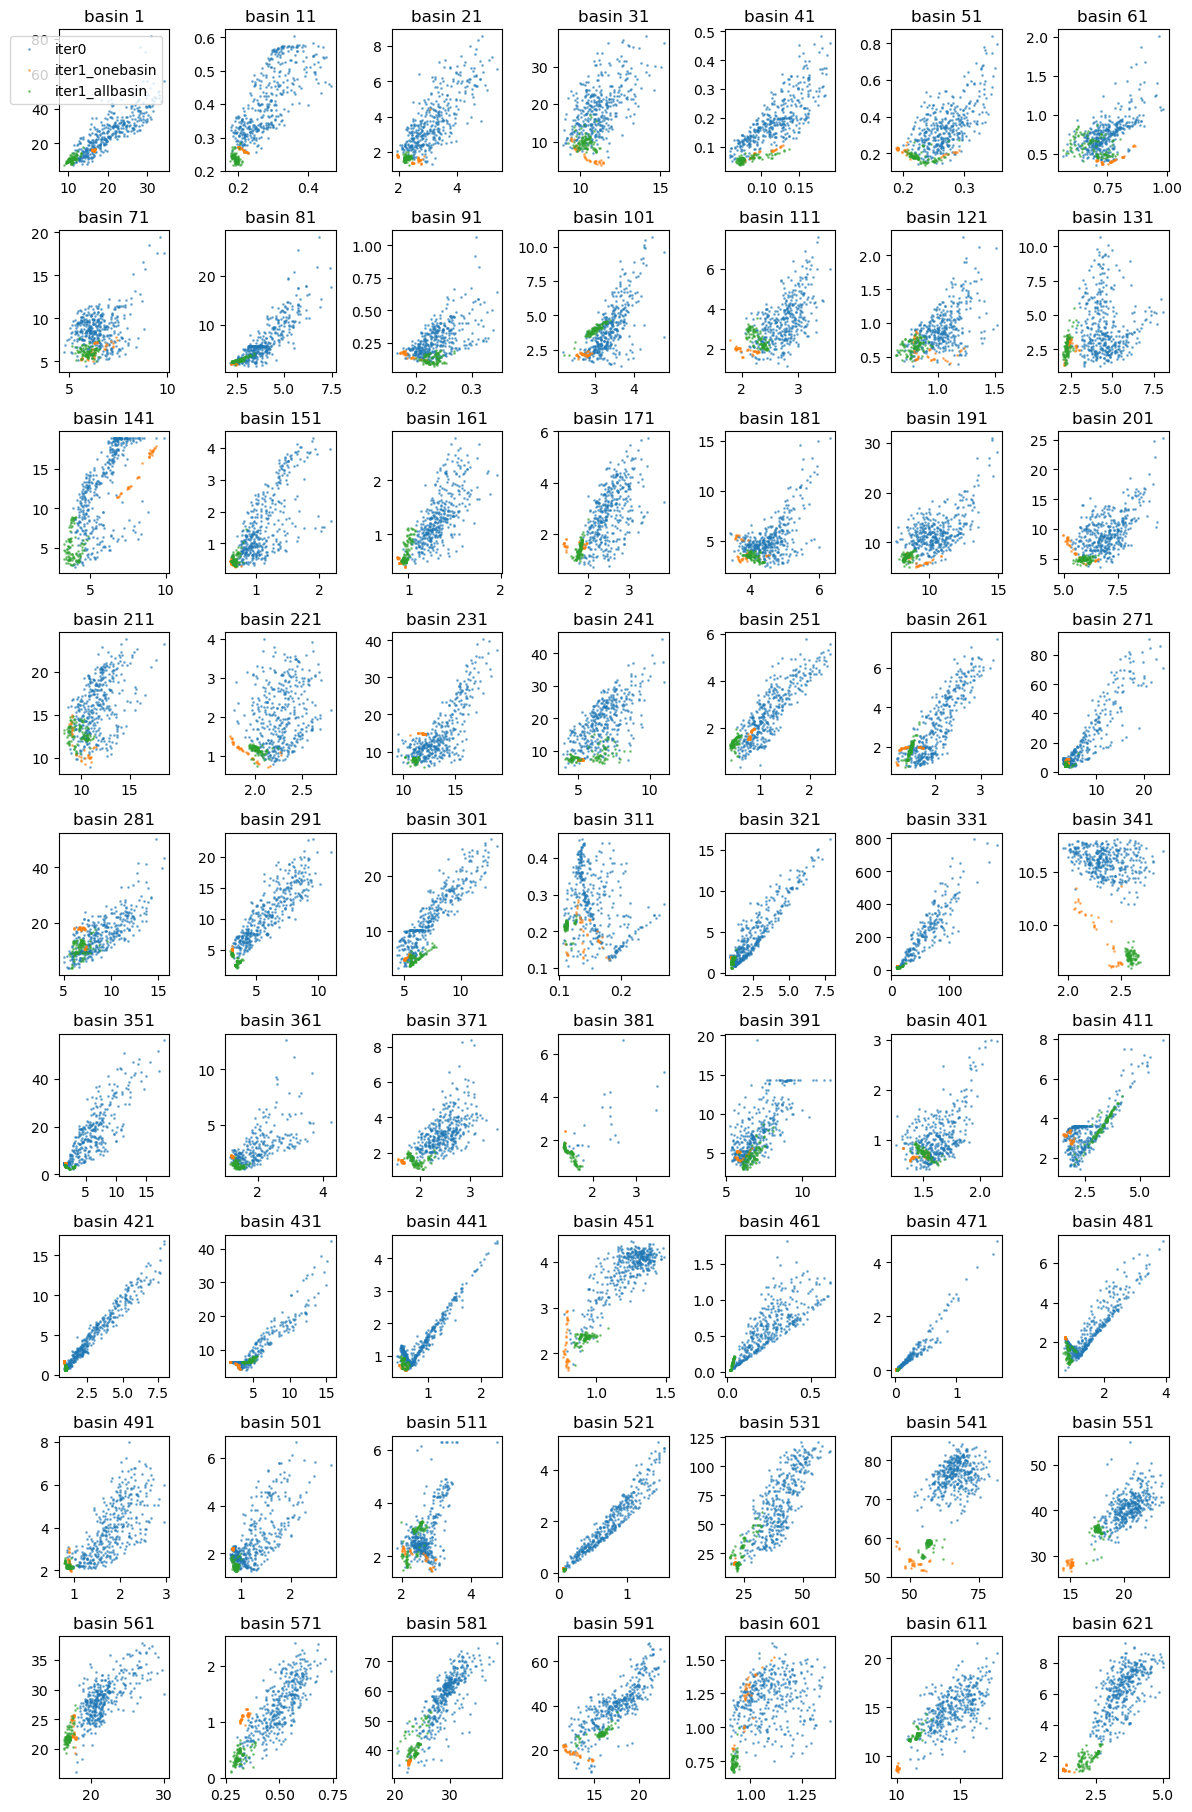

In [6]:
fig = plt.figure(figsize=[12, 20])

flag = 1
for tarbasin in range(1, 627, 10):
    
    inpath_moasmo = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/'
    infile1 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs/iter0_many_metric.csv'
    infile2 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs/iter1_many_metric.csv'
    infile3 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs_emutest/iter1_many_metric.csv'
    
    df_iter0 = pd.read_csv(infile1)
    df_iter1_ob = pd.read_csv(infile2)
    df_iter1_ab = pd.read_csv(infile3)
    
    # compare two error metrics
    labels = ['iter0', 'iter1_onebasin', 'iter1_allbasin']
    data = [df_iter0, df_iter1_ob, df_iter1_ab]

    fig.add_subplot(10, 7, flag)
    for i in range(3):
        plt.scatter(data[i]['mae'], data[i]['max_mon_abs_err'], 1, alpha=0.5, label=labels[i])
    plt.title(f'basin {tarbasin}')

    if flag == 1:
        plt.legend()

    flag = flag + 1
        
plt.tight_layout()
plt.show()

In [5]:
# compare all KGE

bestkge = []
bestmae = []
bestmaxme = []

# for tarbasin in range(1, 627, 10):
for tarbasin in range(627):
    inpath_moasmo = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/'
    infile1 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs/iter0_many_metric.csv'
    infile2 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs/iter1_many_metric.csv'
    infile3 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs_emutest/iter1_many_metric.csv'
    if os.path.isfile(infile1) and os.path.isfile(infile2) and os.path.isfile(infile3):
    
        df_iter0 = pd.read_csv(infile1)
        df_iter1_ob = pd.read_csv(infile2)
        df_iter1_ab = pd.read_csv(infile3)
    
        bestkge.append([ df_iter0['kge'].max(), df_iter1_ob['kge'].max(), df_iter1_ab['kge'].max()])
        bestmae.append([ df_iter0['mae'].min(), df_iter1_ob['mae'].min(), df_iter1_ab['mae'].min()])
        bestmaxme.append([ df_iter0['max_mon_abs_err'].min(), df_iter1_ob['max_mon_abs_err'].min(), df_iter1_ab['max_mon_abs_err'].min()])

bestkge = np.array(bestkge)
print(bestkge.shape)

# plt.plot(bestkge)
# plt.legend(['iter0', 'iter1_onebasin', 'iter1_allbasin'])
# plt.ylim(0, 1)
# plt.show()

bestkge = np.array(bestkge)
print('median bestkge iter0/iter1_onebasin/iter1_allbasin', np.nanmedian(bestkge,axis=0))
print('mean bestkge iter0/iter1_onebasin/iter1_allbasin', np.nanmean(bestkge,axis=0))
print('iter1_onebasin better than iter0', np.sum(bestkge[:,1]>bestkge[:,0]) / bestkge.shape[0])
print('iter1_allbasin better than iter0', np.sum(bestkge[:,2]>bestkge[:,0]) / bestkge.shape[0])


bestmae = np.array(bestmae)
print('median bestmae iter0/iter1_onebasin/iter1_allbasin', np.nanmedian(bestmae,axis=0))
print('mae: iter1_onebasin better than iter0', np.sum(bestmae[:,1]<bestmae[:,0]) / bestmae.shape[0])
print('mae: iter1_allbasin better than iter0', np.sum(bestmae[:,2]<bestmae[:,0]) / bestmae.shape[0])

bestmaxme = np.array(bestmaxme)
print('median bestmaxme iter0/iter1_onebasin/iter1_allbasin', np.nanmedian(bestmaxme,axis=0))
print('max_montherr: iter1_onebasin better than iter0', np.sum(bestmaxme[:,1]<bestmaxme[:,0]) / bestmaxme.shape[0])
print('max_montherr: iter1_allbasin better than iter0', np.sum(bestmaxme[:,2]<bestmaxme[:,0]) / bestmaxme.shape[0])

(625, 3)
median bestkge iter0/iter1_onebasin/iter1_allbasin [0.46154077 0.35883343 0.49819881]
mean bestkge iter0/iter1_onebasin/iter1_allbasin [0.38464823 0.22064141 0.42424501]
iter1_onebasin better than iter0 0.224
iter1_allbasin better than iter0 0.7648
median bestmae iter0/iter1_onebasin/iter1_allbasin [2.19697244 2.37085582 2.45763293]
mae: iter1_onebasin better than iter0 0.4016
mae: iter1_allbasin better than iter0 0.2944
median bestmaxme iter0/iter1_onebasin/iter1_allbasin [1.85086647 2.51446642 2.21096596]
max_montherr: iter1_onebasin better than iter0 0.256
max_montherr: iter1_allbasin better than iter0 0.3072


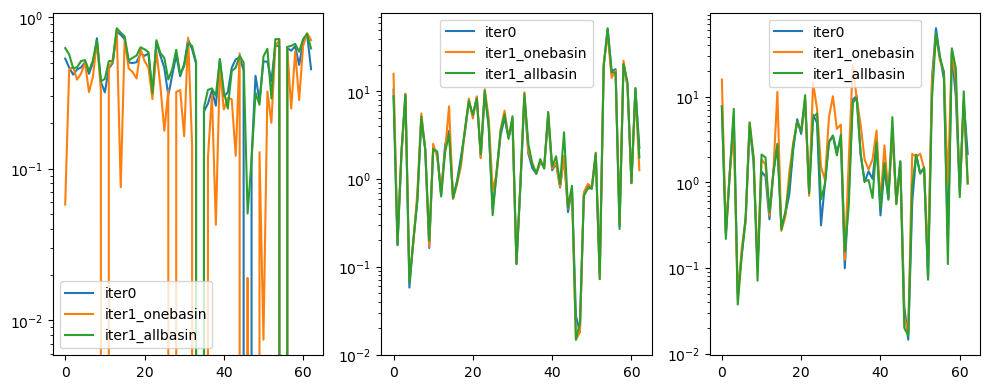

In [8]:
fig = plt.figure(figsize=[10,4])

fig.add_subplot(1,3,1)
plt.plot(bestkge)
plt.legend(['iter0', 'iter1_onebasin', 'iter1_allbasin'])
plt.yscale('log')

fig.add_subplot(1,3,2)
plt.plot(bestmae)
plt.legend(['iter0', 'iter1_onebasin', 'iter1_allbasin'])
plt.yscale('log')

fig.add_subplot(1,3,3)
plt.plot(bestmaxme)
plt.legend(['iter0', 'iter1_onebasin', 'iter1_allbasin'])
plt.yscale('log')

plt.tight_layout()
plt.show()

# Compare with normKGE single objective optimization

In [3]:
# compare all KGE

bestkge = []
bestmae = []
bestmaxme = []
defakge = []

for tarbasin in range(627):
    inpath_moasmo = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/'
    infile1 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs_normKGE/iter0_many_metric.csv'
    infile2 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs_normKGE/iter1_many_metric.csv'
    infile3 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs_emutest/iter1_many_metric.csv'
    if os.path.isfile(infile1) and os.path.isfile(infile2) and os.path.isfile(infile3):
        df_iter0 = pd.read_csv(infile1)
        df_iter1_ob = pd.read_csv(infile2)
        df_iter1_ab = pd.read_csv(infile3)
    
        defakge.append(df_iter0['kge'].values[0])
        bestkge.append([ df_iter0['kge'].max(), df_iter1_ob['kge'].max(), df_iter1_ab['kge'].max()])
        bestmae.append([ df_iter0['mae'].min(), df_iter1_ob['mae'].min(), df_iter1_ab['mae'].min()])
        bestmaxme.append([ df_iter0['max_mon_abs_err'].min(), df_iter1_ob['max_mon_abs_err'].min(), df_iter1_ab['max_mon_abs_err'].min()])

bestkge = np.array(bestkge)
print(bestkge.shape)

# plt.plot(bestkge)
# plt.legend(['iter0', 'iter1_onebasin', 'iter1_allbasin'])
# plt.ylim(0, 1)
# plt.show()

bestkge = np.array(bestkge)
print('median bestkge iter0/iter1_onebasin/iter1_allbasin', np.nanmedian(bestkge,axis=0))
print('mean bestkge iter0/iter1_onebasin/iter1_allbasin', np.nanmean(bestkge,axis=0))
print('iter1_onebasin better than iter0', np.sum(bestkge[:,1]>bestkge[:,0]) / bestkge.shape[0])
print('iter1_allbasin better than iter0', np.sum(bestkge[:,2]>bestkge[:,0]) / bestkge.shape[0])


bestmae = np.array(bestmae)
print('median bestmae iter0/iter1_onebasin/iter1_allbasin', np.nanmedian(bestmae,axis=0))
print('mae: iter1_onebasin better than iter0', np.sum(bestmae[:,1]<bestmae[:,0]) / bestmae.shape[0])
print('mae: iter1_allbasin better than iter0', np.sum(bestmae[:,2]<bestmae[:,0]) / bestmae.shape[0])

bestmaxme = np.array(bestmaxme)
print('median bestmaxme iter0/iter1_onebasin/iter1_allbasin', np.nanmedian(bestmaxme,axis=0))
print('max_montherr: iter1_onebasin better than iter0', np.sum(bestmaxme[:,1]<bestmaxme[:,0]) / bestmaxme.shape[0])
print('max_montherr: iter1_allbasin better than iter0', np.sum(bestmaxme[:,2]<bestmaxme[:,0]) / bestmaxme.shape[0])

(627, 3)
median bestkge iter0/iter1_onebasin/iter1_allbasin [0.46116677 0.44309938 0.50478524]
mean bestkge iter0/iter1_onebasin/iter1_allbasin [0.38221157 0.34721167 0.43016195]
iter1_onebasin better than iter0 0.4370015948963317
iter1_allbasin better than iter0 0.810207336523126
median bestmae iter0/iter1_onebasin/iter1_allbasin [2.184786   2.7520541  2.41640451]
mae: iter1_onebasin better than iter0 0.1850079744816587
mae: iter1_allbasin better than iter0 0.3397129186602871
median bestmaxme iter0/iter1_onebasin/iter1_allbasin [1.8468851  2.79165775 2.06054529]
max_montherr: iter1_onebasin better than iter0 0.18181818181818182
max_montherr: iter1_allbasin better than iter0 0.3748006379585327


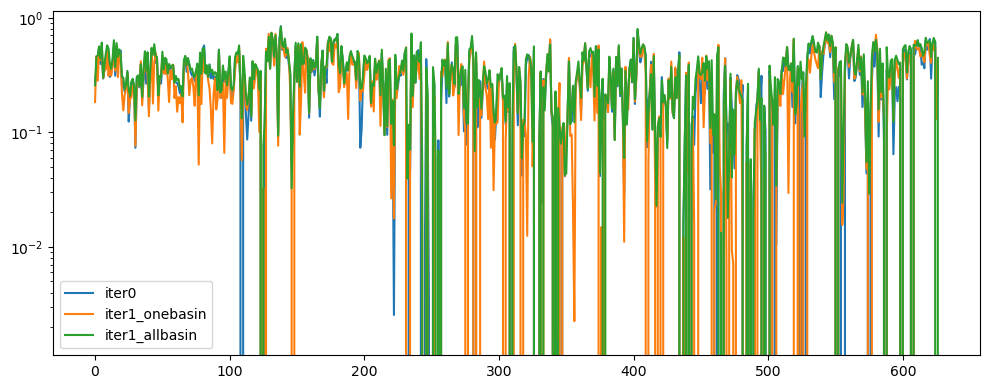

In [4]:
fig = plt.figure(figsize=[10,4])

normkge = bestkge / (2 - bestkge)

plt.plot(normkge)
plt.legend(['iter0', 'iter1_onebasin', 'iter1_allbasin'])
plt.yscale('log')

plt.tight_layout()
plt.show()

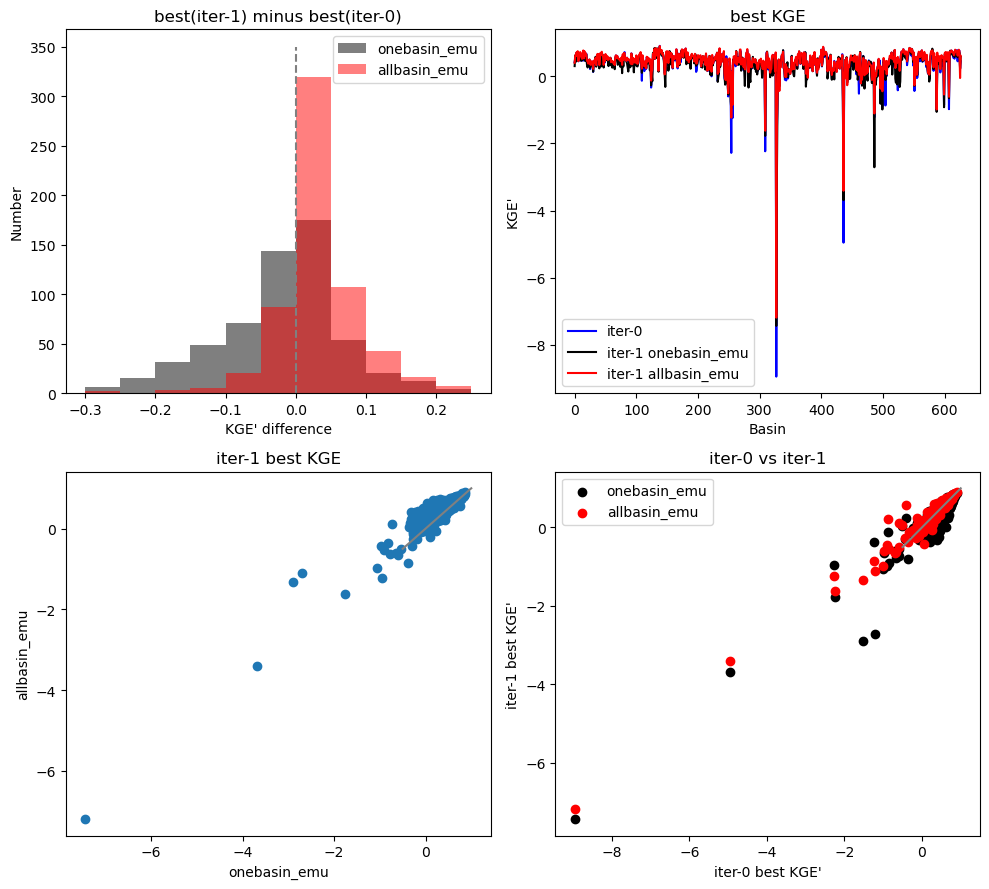

In [6]:
fig = plt.figure(figsize=[10, 9])

fig.add_subplot(2,2,1)
d1 = bestkge[:,1] - bestkge[:,0]
d2 = bestkge[:,2] - bestkge[:,0]
plt.hist(d1, np.arange(-0.3, 0.3, 0.05), alpha=0.5, facecolor='k', label='onebasin_emu')
plt.hist(d2, np.arange(-0.3, 0.3, 0.05), alpha=0.5, facecolor='r', label='allbasin_emu')
plt.plot([0, 0], [0, 350], '--', color='grey')
plt.title('best(iter-1) minus best(iter-0)')
plt.xlabel("KGE' difference")
plt.ylabel('Number')
plt.legend()

fig.add_subplot(2,2,2)
plt.plot(bestkge[:,0], color='blue', label='iter-0')
plt.plot(bestkge[:,1], color='k', label='iter-1 onebasin_emu')
plt.plot(bestkge[:,2], color='r', label='iter-1 allbasin_emu')
plt.title('best KGE')
plt.xlabel("Basin")
plt.ylabel("KGE'")
plt.legend()

fig.add_subplot(2,2,3)
# b1 = np.max(bestkge[:,[0,1]],axis=1)
# b2 = np.max(bestkge[:,[0,2]],axis=1)
# plt.plot(b1, color='k', label='onebasin_emu')
# plt.plot(b2, color='r', label='allbasin_emu')
# plt.title('best(iter1+iter0)')
# plt.xlabel("Basin")
# plt.ylabel("KGE'")
# plt.legend()

# plt.plot(bestkge[:,0], color='blue', label='iter-0')
# plt.plot(bestkge[:,1], color='k', label='iter-1 onebasin_emu')
# plt.plot(bestkge[:,2], color='r', label='iter-1 allbasin_emu')
# plt.title('best KGE')
# plt.xlabel("Basin")
# plt.ylabel("KGE'")
# plt.legend()

plt.scatter(bestkge[:,1], bestkge[:,2])
plt.plot([-0.5, 1], [-0.5, 1], color='grey')
plt.title('iter-1 best KGE')
plt.xlabel("onebasin_emu")
plt.ylabel("allbasin_emu")


fig.add_subplot(2,2,4)
plt.scatter(bestkge[:,0], bestkge[:,1], color='k', label='onebasin_emu')
plt.scatter(bestkge[:,0], bestkge[:,2], color='r', label='allbasin_emu')
plt.plot([-0.5, 1], [-0.5, 1], color='grey')
plt.title('iter-0 vs iter-1')
plt.xlabel("iter-0 best KGE'")
plt.ylabel("iter-1 best KGE'")
plt.legend()

plt.tight_layout()
plt.show()

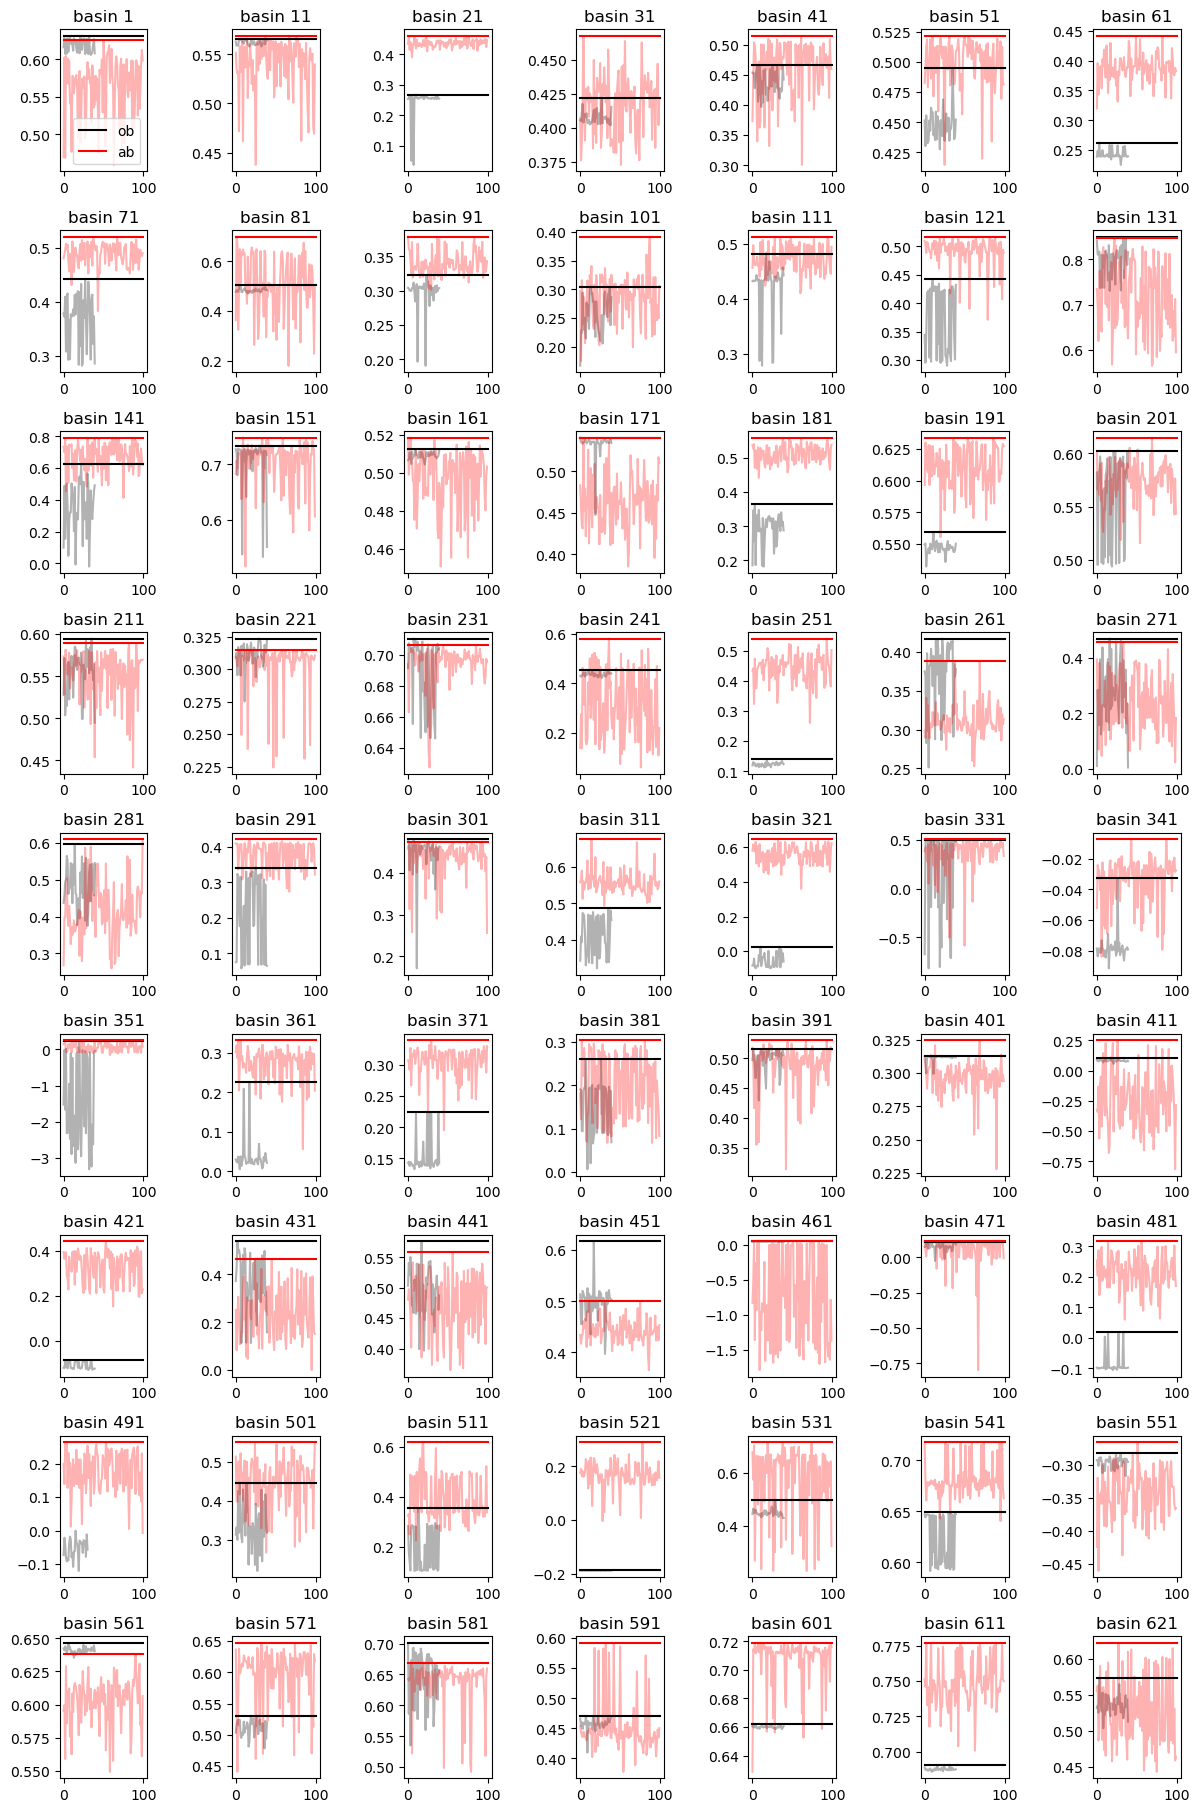

Ratio of allbasin better than onebasin: 0.7619047619047619


In [31]:
fig = plt.figure(figsize=[12, 20])

flag = 1
num = 0
num2 = 0
for tarbasin in range(1, 627, 10):
    inpath_moasmo = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/'
    infile1 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs_normKGE/iter0_many_metric.csv'
    infile2 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs_normKGE/iter1_many_metric.csv'
    infile3 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs_emutest/iter1_many_metric.csv'
    
    # df_iter0 = pd.read_csv(infile1)
    df_iter1_ob = pd.read_csv(infile2)
    df_iter1_ab = pd.read_csv(infile3)

    fig.add_subplot(10, 7, flag)
    # plt.hist(df_iter1_ob['kge'].values, np.arange(0, 1, 0.01), alpha=0.5, label='ob')
    # plt.hist(df_iter1_ab['kge'].values, np.arange(0, 1, 0.01), alpha=0.5, label='ab')

    plt.plot(df_iter1_ob['kge'].values, color='k', alpha=0.3)
    plt.plot(df_iter1_ab['kge'].values, color='r', alpha=0.3)
    d1=np.max(df_iter1_ob['kge'].values)
    plt.plot([0,100],[d1,d1], color='k', label='ob')
    d2=np.max(df_iter1_ab['kge'].values)
    plt.plot([0,100],[d2,d2], color='r', label='ab')

    if d2>d1:
        num = num + 1
    num2 = num2 + 1
    
    plt.title(f'basin {tarbasin}')

    if flag == 1:
        plt.legend()

    flag = flag + 1
        

plt.tight_layout()
plt.show()

print('Ratio of allbasin better than onebasin:', num/num2)